### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Wrangling
#### 3. Data Cleaning
#### 4. Chloropleth Map & Results

### 1. Importing Visualization Libraries and Data

In [1]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Import JSON file.

nyc_boro = r'C:\Users\danie\Desktop\CareerFoundry\Achievement 6-Personal Project\02-2024 NYC Rats\02 Data\new-york-city-boroughs.geojson'

In [3]:
nyc_boro

'C:\\Users\\danie\\Desktop\\CareerFoundry\\Achievement 6-Personal Project\\02-2024 NYC Rats\\02 Data\\new-york-city-boroughs.geojson'

In [6]:
# Check JSON file contents.

f = open(r'C:\Users\danie\Desktop\CareerFoundry\Achievement 6-Personal Project\02-2024 NYC Rats\02 Data\new-york-city-boroughs.geojson',)
  
# Returns JSON object as a dictionary.

data = json.load(f)
  
# Iterate through the json list.

for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Staten Island', 'cartodb_id': 1, 'created_at': '2013-03-09T02:42:03.692Z', 'updated_at': '2013-03-09T02:42:03.989Z'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-74.050508, 40.566422], [-74.050471, 40.566417], [-74.050303, 40.566417], [-74.050126, 40.566406], [-74.049984, 40.566396], [-74.049316, 40.565888], [-74.049236, 40.565363], [-74.050026, 40.565318], [-74.050744, 40.565887], [-74.050748, 40.565954], [-74.050732, 40.565992], [-74.050736, 40.566033], [-74.050803, 40.566052], [-74.050873, 40.566081], [-74.050906, 40.566094], [-74.050913, 40.566134], [-74.050882, 40.566178], [-74.050853, 40.56619], [-74.050834, 40.566197], [-74.050765, 40.566199], [-74.050708, 40.566194], [-74.050688, 40.566218], [-74.050683, 40.566237], [-74.050683, 40.56627], [-74.050679, 40.566311], [-74.050696, 40.566361], [-74.050734, 40.566395], [-74.050784, 40.566431], [-74.050839, 40.566469], [-74.050884, 40.566488], [-74.050934, 40.566528], [-74.05097

In [4]:
# Define path.

path = r'C:\Users\danie\Desktop\CareerFoundry\Achievement 6-Personal Project'
path

'C:\\Users\\danie\\Desktop\\CareerFoundry\\Achievement 6-Personal Project'

In [5]:
# Import data.

df = pd.read_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'Data_Cleaned_2.csv'))

### 2. Data Wrangling

In [8]:
# Investigate dataframe.

df

Unnamed: 0 INSPECTION_TYPE  JOB_PROGRESS  BORO_CODE  ZIP_CODE  \
0                 0         Initial             1          2   10451.0   
1                 1         Initial             1          2   10457.0   
2                 2         Initial             1          1   10031.0   
3                 3         Initial             1          2   10458.0   
4                 4         Initial             1          1   10009.0   
...             ...             ...           ...        ...       ...   
1908362     1908362      Compliance             2          3   11211.0   
1908363     1908363         Initial             1          3   11221.0   
1908364     1908364         Initial             1          3   11216.0   
1908365     1908365         Initial             1          2   10468.0   
1908366     1908366         Initial             1          2   10472.0   

          LATITUDE  LONGITUDE    BOROUGH      INSPECTION_DATE        RESULT  \
0        40.826932 -73.925286      Bronx  2016-09-26 13:10:25        Passed   
1        40.845931 -73.896556      Bronx  2016-11-29 16:07:06        Passed   
2        40.822391 -73.946768  Manhattan  2014-09-03 10:12:14        Passed   
3        40.873780 -73.885892      Bronx  2023-02-02 14:50:46        Passed   
4        40.728739 -73.981585  Manhattan  2019-04-04 09:57:25        Passed   
...            ...        ...        ...                  ...           ...   
1908362  40.707009 -73.951506   Brooklyn  2023-05-26 12:10:32  Rat Activity   
1908363  40.693240 -73.934099   Brooklyn  2018-10-24 08:18:18        Passed   
1908364  40.681242 -73.941610   Brooklyn  2019-10-08 12:30:42  Rat Activity   
1908365  40.860442 -73.902140      Bronx  2018-05-08 13:46:46        Passed   
1908366  40.829062 -73.864744      Bronx  2017-08-01 11:13:26        Passed   

                                    LOCATION  COMMUNITY BOARD  \
0        (40.826932154585, -73.925286438191)              4.0   
1        (40.845930919837, -73.896555813219)              6.0   
2        (40.822390591115, -73.946767934183)              9.0   
3        (40.873779859166, -73.885892352785)              7.0   
4         (40.728739451411, -73.98158466403)              3.0   
...                                      ...              ...   
1908362  (40.707008581511, -73.951506038819)              1.0   
1908363  (40.693240354692, -73.934098663565)              3.0   
1908364  (40.681241527023, -73.941609885172)              3.0   
1908365  (40.860441730285, -73.902140323668)              5.0   
1908366  (40.829061640406, -73.864743726902)              9.0   

         COUNCIL DISTRICT  CENSUS TRACT                    NEIGHBORHOOD  \
0                    16.0        6301.0     Concourse-Concourse Village   
1                    15.0         395.0                         Tremont   
2                     9.0         227.0     Hamilton Heights-Sugar Hill   
3                    11.0         413.0                    Bedford Park   
4                     2.0          34.0                    East Village   
...                   ...           ...                             ...   
1908362              34.0         527.0                    Williamsburg   
1908363              36.0         289.0       Bedford-Stuyvesant (East)   
1908364              36.0         269.0       Bedford-Stuyvesant (West)   
1908365              14.0         239.0                 Fordham Heights   
1908366              18.0          70.0  Soundview-Bruckner-Bronx River   

         inspection_year  inspection_month  
0                   2016                 9  
1                   2016                11  
2                   2014                 9  
3                   2023                 2  
4                   2019                 4  
...                  ...               ...  
1908362             2023                 5  
1908363             2018                10  
1908364             2019                10  
1908365             2018               

In [10]:
# Check data types.

df.dtypes

Unnamed: 0            int64
INSPECTION_TYPE      object
JOB_PROGRESS          int64
BORO_CODE             int64
ZIP_CODE            float64
LATITUDE            float64
LONGITUDE           float64
BOROUGH              object
INSPECTION_DATE      object
RESULT               object
LOCATION             object
COMMUNITY BOARD     float64
COUNCIL DISTRICT    float64
CENSUS TRACT        float64
NEIGHBORHOOD         object
inspection_year       int64
inspection_month      int64
dtype: object

In [11]:
# Check missing values.

# Check for missing values.

df.isnull().sum() # No missing values found.

Unnamed: 0          0
INSPECTION_TYPE     0
JOB_PROGRESS        0
BORO_CODE           0
ZIP_CODE            0
LATITUDE            0
LONGITUDE           0
BOROUGH             0
INSPECTION_DATE     0
RESULT              0
LOCATION            0
COMMUNITY BOARD     0
COUNCIL DISTRICT    0
CENSUS TRACT        0
NEIGHBORHOOD        0
inspection_year     0
inspection_month    0
dtype: int64

In [12]:
# Check duplicates.

df_dups = df[df.duplicated()]

In [13]:
df_dups.shape # No duplicates found.

(0, 17)

In [14]:
# Check for mixed-type data.

for col in df.columns.tolist():
      weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col) # No mixed-type data found.

In [15]:
# Remove unnecessary columns.

df = df.drop(columns=['Unnamed: 0'])

In [16]:
# Check output.

df

INSPECTION_TYPE  JOB_PROGRESS  BORO_CODE  ZIP_CODE   LATITUDE  \
0               Initial             1          2   10451.0  40.826932   
1               Initial             1          2   10457.0  40.845931   
2               Initial             1          1   10031.0  40.822391   
3               Initial             1          2   10458.0  40.873780   
4               Initial             1          1   10009.0  40.728739   
...                 ...           ...        ...       ...        ...   
1908362      Compliance             2          3   11211.0  40.707009   
1908363         Initial             1          3   11221.0  40.693240   
1908364         Initial             1          3   11216.0  40.681242   
1908365         Initial             1          2   10468.0  40.860442   
1908366         Initial             1          2   10472.0  40.829062   

         LONGITUDE    BOROUGH      INSPECTION_DATE        RESULT  \
0       -73.925286      Bronx  2016-09-26 13:10:25        Passed   
1       -73.896556      Bronx  2016-11-29 16:07:06        Passed   
2       -73.946768  Manhattan  2014-09-03 10:12:14        Passed   
3       -73.885892      Bronx  2023-02-02 14:50:46        Passed   
4       -73.981585  Manhattan  2019-04-04 09:57:25        Passed   
...            ...        ...                  ...           ...   
1908362 -73.951506   Brooklyn  2023-05-26 12:10:32  Rat Activity   
1908363 -73.934099   Brooklyn  2018-10-24 08:18:18        Passed   
1908364 -73.941610   Brooklyn  2019-10-08 12:30:42  Rat Activity   
1908365 -73.902140      Bronx  2018-05-08 13:46:46        Passed   
1908366 -73.864744      Bronx  2017-08-01 11:13:26        Passed   

                                    LOCATION  COMMUNITY BOARD  \
0        (40.826932154585, -73.925286438191)              4.0   
1        (40.845930919837, -73.896555813219)              6.0   
2        (40.822390591115, -73.946767934183)              9.0   
3        (40.873779859166, -73.885892352785)              7.0   
4         (40.728739451411, -73.98158466403)              3.0   
...                                      ...              ...   
1908362  (40.707008581511, -73.951506038819)              1.0   
1908363  (40.693240354692, -73.934098663565)              3.0   
1908364  (40.681241527023, -73.941609885172)              3.0   
1908365  (40.860441730285, -73.902140323668)              5.0   
1908366  (40.829061640406, -73.864743726902)              9.0   

         COUNCIL DISTRICT  CENSUS TRACT                    NEIGHBORHOOD  \
0                    16.0        6301.0     Concourse-Concourse Village   
1                    15.0         395.0                         Tremont   
2                     9.0         227.0     Hamilton Heights-Sugar Hill   
3                    11.0         413.0                    Bedford Park   
4                     2.0          34.0                    East Village   
...                   ...           ...                             ...   
1908362              34.0         527.0                    Williamsburg   
1908363              36.0         289.0       Bedford-Stuyvesant (East)   
1908364              36.0         269.0       Bedford-Stuyvesant (West)   
1908365              14.0         239.0                 Fordham Heights   
1908366              18.0          70.0  Soundview-Bruckner-Bronx River   

         inspection_year  inspection_month  
0                   2016                 9  
1                   2016                11  
2                   2014                 9  
3                   2023                 2  
4                   2019                 4  
...                  ...               ...  
1908362             2023                 5  
1908363             2018                10  
1908364             2019                10  
1908365             2018                 5  
1908366             2017                 8  

[1908367 rows x 16 columns]

### Data Cleaning

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='JOB_PROGRESS', ylabel='Count'>

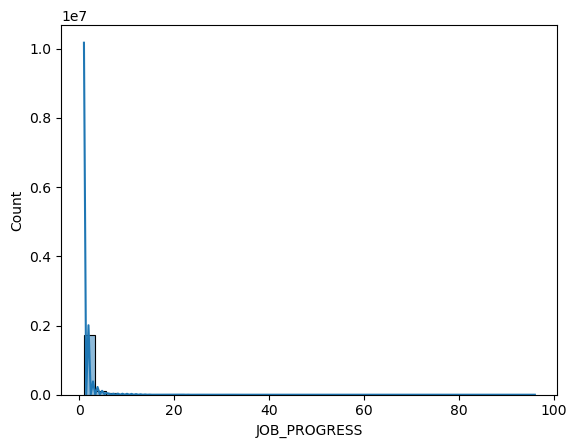

In [19]:
# Check for extreme values in JOB_PROGRESS.

sns.histplot(df['JOB_PROGRESS'], bins = 40, kde = True)

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BOROUGH', ylabel='Count'>

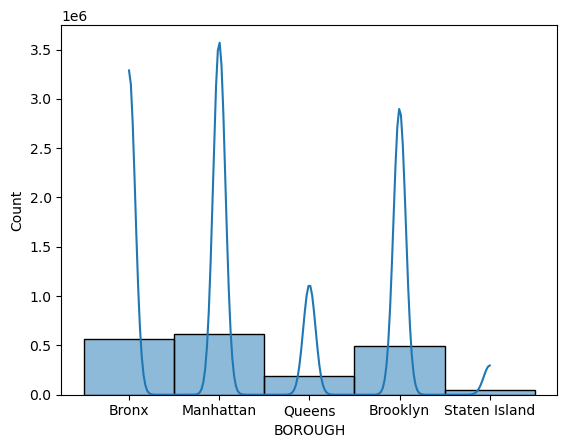

In [21]:
# Check for extreme values in BOROUGH.

sns.histplot(df['BOROUGH'], bins = 20, kde = True)

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='inspection_year', ylabel='Count'>

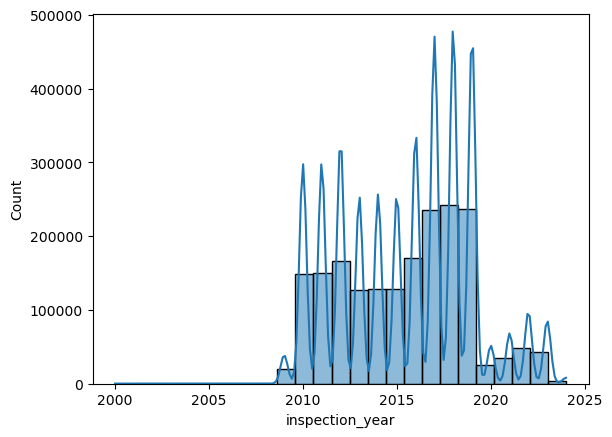

In [22]:
# Check for extreme values in inspection_year.

sns.histplot(df['inspection_year'], bins = 25, kde = True)

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RESULT', ylabel='Count'>

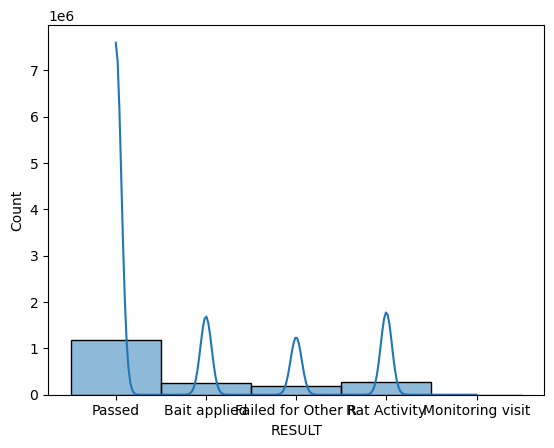

In [23]:
# Check for extreme values in RESULT.

sns.histplot(df['RESULT'], bins = 25, kde = True)

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='INSPECTION_TYPE', ylabel='Count'>

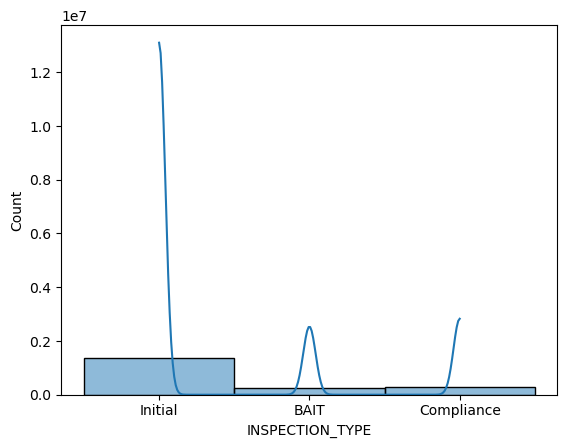

In [25]:
# Check for extreme values in INSPECTION_TYPE.

sns.histplot(df['INSPECTION_TYPE'], bins = 25, kde = True)

In [33]:
# Count value counts for BOROUGH.

df['BOROUGH'].value_counts(dropna=False)

BOROUGH
Manhattan        610685
Bronx            561065
Brooklyn         495774
Queens           190264
Staten Island     50579
Name: count, dtype: int64

In [37]:
# Convert BOROUGH value_counts to output to dataframe.

data_to_plot = df['BOROUGH'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

In [38]:
data_to_plot

BOROUGH   count
0      Manhattan  610685
1          Bronx  561065
2       Brooklyn  495774
3         Queens  190264
4  Staten Island   50579

### 4. Chloropleth Map & Results

In [45]:
# Setup a folium map at a high-level zoom.

map = folium.Map(location = [41, -74], zoom_start = 10)

folium.Choropleth(
    geo_data = nyc_boro, 
    data = data_to_plot,
    columns = ['BOROUGH', 'count'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of Rat Inspections").add_to(map)
folium.LayerControl().add_to(map)

map

The above chloropleth indicates that Manhattan has the most rat inspections followed by Brooklyn, which answers my existing research question, "Which boroughs have the most inspections?"

This analysis raises new research questions including, "Which boroughs have the most repeat visits per location?" and "How do inspection results vary by borough?"